In [1]:
import pandas as pd
import numpy as np
import re
import ast
import matplotlib as plt
import seaborn as sns
import datetime

In [2]:
#Como estructura de la carpeta de trabajo separe las resoluciones en pdf del excel inicial
path_herramientas = "..\\data\\original\\Resoluciones\\"
path_original = "..\\data\\original\\"

In [3]:
#Para aquellos que deseen chequear donde esta su carpeta de trabajo.
import os
os.getcwd()

'c:\\Users\\fede_\\Desktop\\ODSL\\nlp-juzgado\\notebooks'

In [4]:
set_unificado = pd.read_excel(path_original + "set_de_datos_unificado_juzgado.xlsx")
set_unificado.shape

(3835, 69)

In [5]:
violencia = set_unificado[set_unificado["VIOLENCIA_DE_GENERO"] == "si"]
violencia.shape


(891, 69)

In [6]:
violencia['FECHA_DEL_HECHO'] = violencia['FECHA_DEL_HECHO'].fillna(0)

violencia = violencia[violencia["FECHA_DEL_HECHO"] != 0]

In [7]:
violencia["FECHA_DEL_HECHO"] = violencia.FECHA_DEL_HECHO.replace('_','/', regex=True)


In [8]:

violencia['FECHA_DEL_HECHO'] = pd.to_datetime(violencia['FECHA_DEL_HECHO'] ,errors ='coerce')
violencia['año'] = violencia['FECHA_DEL_HECHO'].dt.year
violencia['mes'] = violencia['FECHA_DEL_HECHO'].dt.month

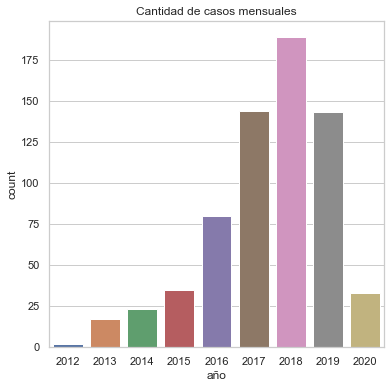

In [21]:

sns.set(style="whitegrid", color_codes=True,rc={'figure.figsize':(6,6)})
ax = sns.countplot(violencia['año'])

ax.set_title('Cantidad de casos mensuales')
plt.show()

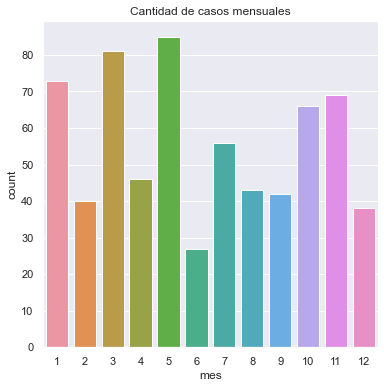

In [20]:
sns.set(style="darkgrid", color_codes=True,rc={'figure.figsize':(6,6)})
ax = sns.countplot(violencia['mes'])

ax.set_title('Cantidad de casos mensuales')
plt.show()

In [11]:
dataframe = violencia[["ART_INFRINGIDO", "CONDUCTA","V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB"]]
dataframe = dataframe.replace("no", 0)
dataframe = dataframe.replace("si", 1)

In [12]:
articulo = dataframe[["CONDUCTA","ART_INFRINGIDO"]]

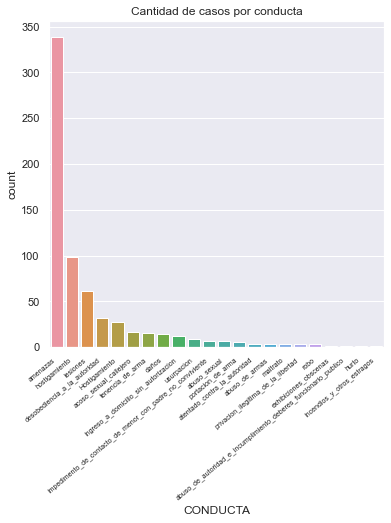

In [19]:
import matplotlib.pyplot as plt

ax = sns.countplot(data = articulo, x = 'CONDUCTA',
              order = articulo['CONDUCTA'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=7, rotation=40, ha="right")

ax.set_title('Cantidad de casos por conducta')
plt.show()

In [14]:
grafico_data = pd.crosstab(index=articulo["CONDUCTA"], 
                     columns="count")                  
grafico_data.sort_values(by = ['count'], ascending = [False])

col_0                                               count
CONDUCTA                                                 
amenazas                                              339
hostigamiento                                          99
lesiones                                               61
desobediencia_a_la_autoridad                           32
Hostigamiento                                          27
acoso_sexual_callejero                                 17
tenencia_de_arma                                       15
daños                                                  14
ingreso_a_domicilio_sin_autorizacion                   12
usurpacion                                              9
impedimento_de_contacto_de_menor_con_padre_no_c...      7
abuso_sexual                                            7
portacion_de_arma                                       6
abuso_de_armas                                          4
atentado_contra_la_autoridad                            4
maltrato                                                3
privacion_ilegitima_de_la_libertad                      3
robo                                                    3
exhibiciones_obscenas                                   1
incendios_y_otros_estragos                              1
abuso_de_autoridad_e_incumplimiento_deberes_fun...      1
hurto                                                   1

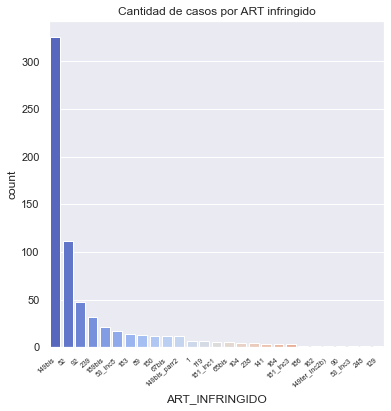

<Figure size 1440x1440 with 0 Axes>

In [17]:
ax = sns.countplot(data = articulo, x = 'ART_INFRINGIDO',
              order = articulo['ART_INFRINGIDO'].value_counts().index, palette ='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=7, rotation=40, ha="right")

plt.figure(figsize = (20,20))

ax.set_title('Cantidad de casos por ART infringido')

plt.show()

In [64]:
grafico2 = pd.crosstab(index=articulo["ART_INFRINGIDO"], 
                     columns="count")                  
grafico2.sort_values(by = ['count'], ascending = [False])

col_0           count
ART_INFRINGIDO       
149bis            326
52                111
92                 47
239                32
189bis             21
53_inc5            17
183                14
89                 13
150                12
67bis              12
149bis_parr2       12
1                   7
119                 7
181_inc1            6
65bis               5
104                 4
238                 4
141                 3
181_inc3            3
164                 3
248                 1
129                 1
53_inc3             1
186                 1
162                 1
90                  1
149ter_inc2b)       1

In [73]:
group_by_cond_art =  articulo.groupby(['CONDUCTA','ART_INFRINGIDO'])
correlacion = pd.DataFrame(group_by_cond_art.size().reset_index(name = "Group_Count"))
correlacion

CONDUCTA ART_INFRINGIDO  \
0                                       Hostigamiento             52   
1                                       Hostigamiento        53_inc5   
2                                      abuso_de_armas            104   
3   abuso_de_autoridad_e_incumplimiento_deberes_fu...            248   
4                                        abuso_sexual            119   
5                              acoso_sexual_callejero          65bis   
6                              acoso_sexual_callejero          67bis   
7                                            amenazas         149bis   
8                                            amenazas   149bis_parr2   
9                                            amenazas  149ter_inc2b)   
10                       atentado_contra_la_autoridad            238   
11                                              daños            183   
12                       desobediencia_a_la_autoridad            239   
13                              exhibiciones_obscenas            129   
14                                      hostigamiento             52   
15                                      hostigamiento        53_inc3   
16                                      hostigamiento        53_inc5   
17                                              hurto            162   
18  impedimento_de_contacto_de_menor_con_padre_no_...              1   
19                         incendios_y_otros_estragos            186   
20               ingreso_a_domicilio_sin_autorizacion            150   
21                                           lesiones             89   
22                                           lesiones             90   
23                                           lesiones             92   
24                                           maltrato        53_inc5   
25                                  portacion_de_arma         189bis   
26                 privacion_ilegitima_de_la_libertad            141   
27                                               robo            164   
28                                   tenencia_de_arma         189bis   
29                                         usurpacion       181_inc1   
30                                         usurpacion       181_inc3   

    Group_Count  
0            25  
1             2  
2             4  
3             1  
4             7  
5             5  
6            12  
7           326  
8            12  
9             1  
10            4  
11           14  
12           32  
13            1  
14           86  
15            1  
16           12  
17            1  
18            7  
19            1  
20           12  
21           13  
22            1  
23           47  
24            3  
25            6  
26            3  
27            3  
28           15  
29            6  
30            3

In [75]:
dataframe.head()

ART_INFRINGIDO       CONDUCTA V_FISICA V_PSIC V_ECON V_SEX V_SOC V_AMB  \
1          149bis       amenazas        0      1      0     0     0     0   
2              52  hostigamiento        1      1      1     0     0     0   
4          149bis       amenazas        0      1      1     0     1     0   
9          149bis       amenazas        1      1      0     0     1     0   
20         149bis       amenazas        0      0      1     0     0     0   

   V_SIMB  
1       1  
2       1  
4       1  
9       1  
20      0

In [76]:
tipos_v = dataframe.loc[:, dataframe.columns != 'CONDUCTA']
#Remplazos nulos y s/d por 0
tipos_v = tipos_v.fillna(0)
tipos_v = tipos_v.replace("s/d",0)


In [77]:
#Creo una tabla de contingencia que luego utilizaré en el heatmap
tabla = tipos_v.groupby(['ART_INFRINGIDO'], as_index=True).sum()
tabla = tabla.div(tabla.sum(1), 0).assign(Total=lambda tabla: tabla.sum(axis=1))
#.mul(100).round(2)
#tabla



Text(0.5, 1.0, '% de violencia por Articulo Infringido')

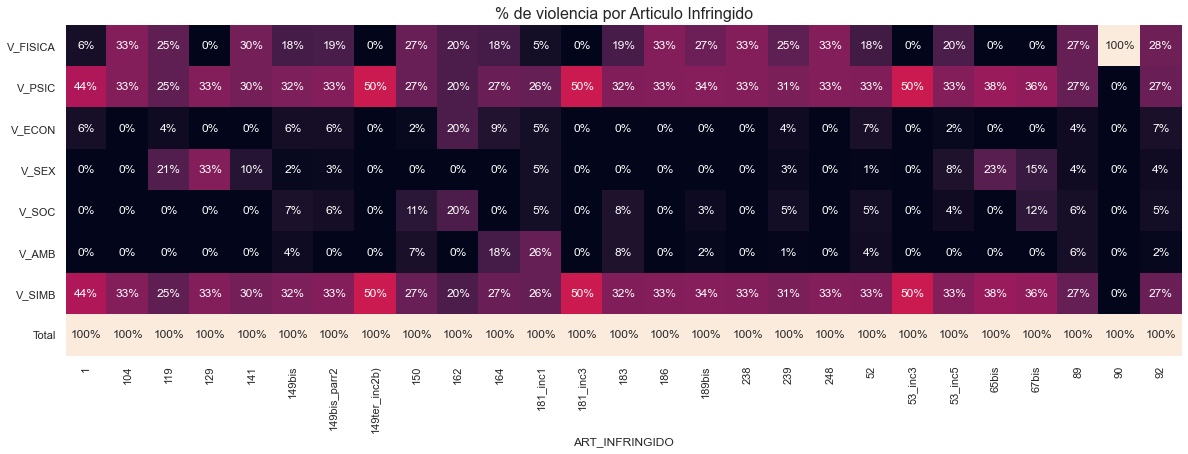

In [78]:
tabla2 = tabla.transpose()

plt.figure(figsize = (20,20))
sns.heatmap(tabla2,annot = True,square = True,   fmt='.0%', cbar = False)

plt.title('% de violencia por Articulo Infringido', fontsize = 16) 

In [79]:
tipos_coduct = dataframe.loc[:, dataframe.columns != 'ART_INFRINGIDO']
tipos_coduct.isnull().sum(axis=0)
tipos_coduct = tipos_coduct.fillna(0)
tipos_coduct = tipos_coduct.replace("s/d",0)

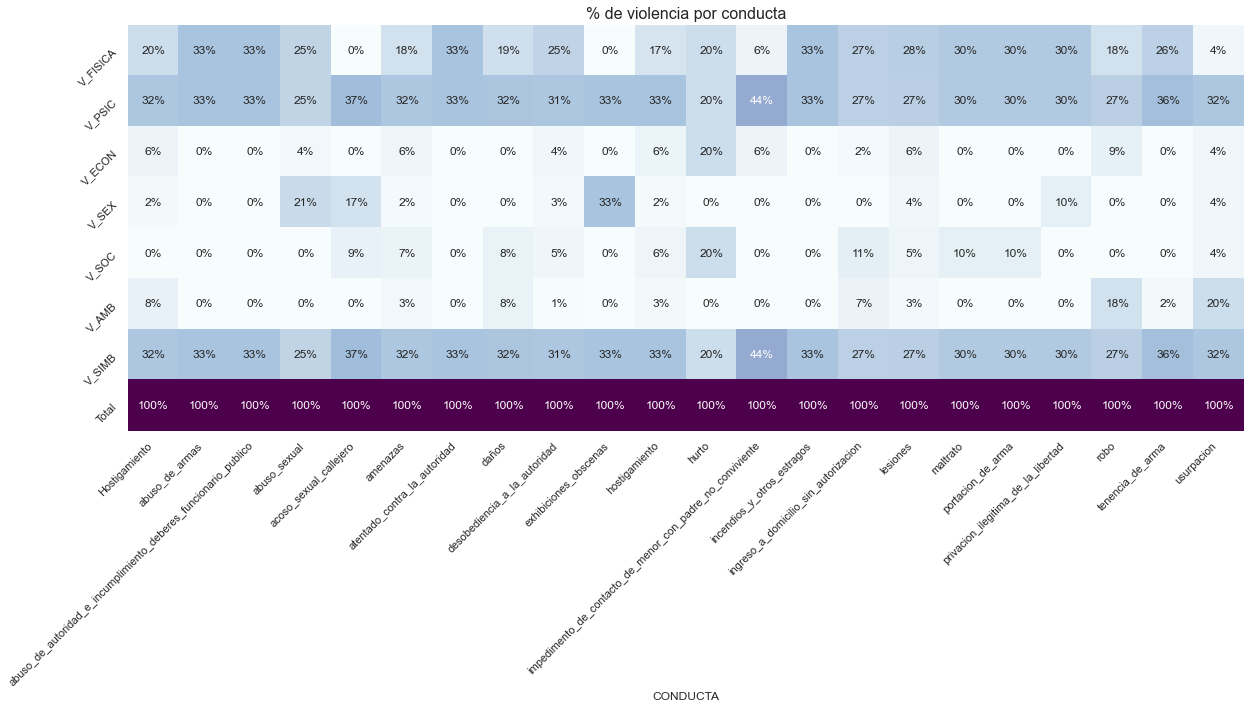

In [80]:
tabla_conducta = tipos_coduct.groupby(['CONDUCTA'], as_index=True).sum()
tabla_conducta = tabla_conducta.div(tabla_conducta.sum(1), 0).assign(Total=lambda tabla: tabla.sum(axis=1))
tabla_conducta_t = tabla_conducta.transpose()


plt.figure(figsize = (20,20))
htmap = sns.heatmap(tabla_conducta_t,annot = True,square = True,   fmt='.0%', cbar = False, cmap="BuPu")

#htmap.set_xticklabels(htmap.get_xticklabels(), rotation=45, horizontalalignment='right')

htmap.set_yticklabels(htmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.title('% de violencia por conducta', fontsize = 16) 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
     
)

htmap